题目设计：Python 数据处理与数据库管理 (40分)
题目背景：
你是一个电子商务平台的数据分析师，负责处理订单数据并生成客户报告。你的任务是编写一个 Python 程序，完成以下功能：

任务描述：
数据库创建与初始化 (5分)
创建一个名为 ecommerce.db 的 SQLite 数据库，包含以下表格：

Orders：
OrderID (主键，整数)
CustomerName (字符串)
Product (字符串)
Quantity (整数)
Price (浮点数)
插入以下示例数据：
mathematica
| OrderID | CustomerName | Product       | Quantity | Price  |
|---------|--------------|---------------|----------|--------|
| 1       | Alice        | Laptop        | 1        | 1200.5 |
| 2       | Bob          | Smartphone    | 2        | 700.0  |
| 3       | Alice        | Headphones    | 3        | 50.0   |
| 4       | Charlie      | Monitor       | 1        | 200.0  |

计算订单总金额 (10分)
编写一个函数 calculate_total，从 Orders 表中读取数据，并为每个客户计算订单总金额，返回如下格式的结果：


| CustomerName | TotalAmount |
|--------------|-------------|
| Alice        | 1350.5      |
| Bob          | 1400.0      |
| Charlie      | 200.0       |

数据可视化 (10分)
使用 Matplotlib 绘制一个柱状图，展示每位客户的总金额，标题为 “Customer Order Totals”。

查询特定客户数据 (10分)
编写一个函数 query_customer_orders(customer_name)，根据输入的客户姓名，返回该客户的所有订单数据。例如，输入 Alice 时，返回：

mathematica
| OrderID | Product       | Quantity | Price  |
|---------|---------------|----------|--------|
| 1       | Laptop        | 1        | 1200.5 |
| 3       | Headphones    | 3        | 50.0   |

异常处理 (5分)

如果客户姓名在数据库中不存在，应打印 “No orders found for this customer.”
数据库操作失败时，捕获异常并打印错误信息。

Customer Totals:
('Alice', 1350.5)
('Bob', 1400.0)
('Charlie', 200.0)


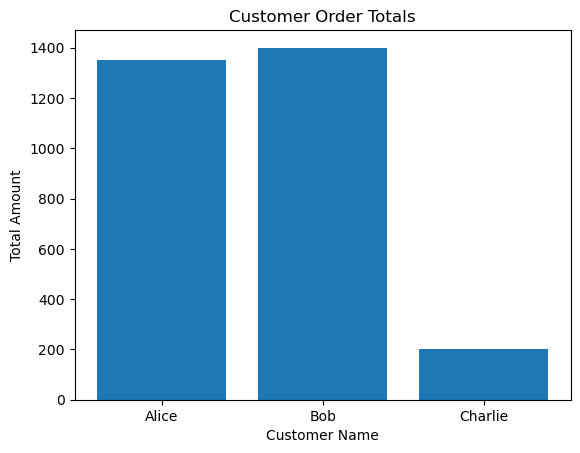

(1, 'Laptop', 1, 1200.5)
(3, 'Headphones', 3, 50.0)
No orders found for David.


In [1]:
import sqlite3
import matplotlib.pyplot as plt

# 1. 创建数据库并插入数据
def create_database():
    conn = sqlite3.connect("ecommerce.db")
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Orders (
            OrderID INTEGER PRIMARY KEY,
            CustomerName TEXT NOT NULL,
            Product TEXT NOT NULL,
            Quantity INTEGER NOT NULL,
            Price REAL NOT NULL
        )
    ''')
    cursor.executemany('''
        INSERT INTO Orders (OrderID, CustomerName, Product, Quantity, Price)
        VALUES (?, ?, ?, ?, ?)
    ''', [
        (1, 'Alice', 'Laptop', 1, 1200.5),
        (2, 'Bob', 'Smartphone', 2, 700.0),
        (3, 'Alice', 'Headphones', 3, 50.0),
        (4, 'Charlie', 'Monitor', 1, 200.0)
    ])
    conn.commit()
    conn.close()

# 2. 计算订单总金额
def calculate_total():
    conn = sqlite3.connect("ecommerce.db")
    cursor = conn.cursor()
    cursor.execute('''
        SELECT CustomerName, SUM(Quantity * Price) AS TotalAmount
        FROM Orders
        GROUP BY CustomerName
    ''')
    results = cursor.fetchall()
    conn.close()
    return results

# 3. 数据可视化
def plot_totals(totals):
    customer_names = [row[0] for row in totals]
    total_amounts = [row[1] for row in totals]

    plt.bar(customer_names, total_amounts)
    plt.title("Customer Order Totals")
    plt.xlabel("Customer Name")
    plt.ylabel("Total Amount")
    plt.show()

# 4. 查询特定客户订单
def query_customer_orders(customer_name):
    try:
        conn = sqlite3.connect("ecommerce.db")
        cursor = conn.cursor()
        cursor.execute('''
            SELECT OrderID, Product, Quantity, Price
            FROM Orders
            WHERE CustomerName = ?
        ''', (customer_name,))
        results = cursor.fetchall()
        conn.close()
        
        if results:
            for row in results:
                print(row)
        else:
            print(f"No orders found for {customer_name}.")
    except sqlite3.Error as e:
        print("Database error:", e)

# 主程序
create_database()

# 计算总金额并打印
totals = calculate_total()
print("Customer Totals:")
for row in totals:
    print(row)

# 绘制柱状图
plot_totals(totals)

# 查询客户订单
query_customer_orders("Alice")
query_customer_orders("David")  # 异常测试


题目设计：Python 数据分析与文件操作 (40分)
题目背景：
你是一家物流公司的数据工程师，负责分析物流运输数据并生成报告。公司每天会生成一份运输数据文件，你需要用 Python 编写程序进行数据处理和分析。

任务描述：
数据文件解析与读取 (5分)
编写函数 load_data(file_path)，从一个 CSV 文件中加载运输数据，返回一个包含所有数据的列表。CSV 文件格式如下：

OrderID, CustomerName, City, Distance, Weight, Cost
101, Alice, Glasgow, 200, 10, 50
102, Bob, London, 400, 25, 100
103, Charlie, Manchester, 300, 15, 75
104, Alice, Glasgow, 100, 5, 25
计算客户总运输成本 (10分)
编写函数 calculate_total_cost(data)，计算每个客户的总运输成本，并以字典形式返回。例如：

json
{
    "Alice": 75,
    "Bob": 100,
    "Charlie": 75
}
基于城市统计运输数据 (10分)
编写函数 city_summary(data)，统计每个城市的总运输重量和运输距离，返回如下格式的字典：

json
{
    "Glasgow": {"TotalWeight": 15, "TotalDistance": 300},
    "London": {"TotalWeight": 25, "TotalDistance": 400},
    "Manchester": {"TotalWeight": 15, "TotalDistance": 300}
}
生成报告并保存到文件 (10分)
编写函数 save_report(file_path, total_cost, city_summary)，将客户总运输成本和城市运输统计写入一个新的文本文件，格式如下：

yaml
Customer Total Costs:
Alice: 75
Bob: 100
Charlie: 75

City Summary:
Glasgow: TotalWeight=15, TotalDistance=300
London: TotalWeight=25, TotalDistance=400
Manchester: TotalWeight=15, TotalDistance=300
异常处理 (5分)

如果输入文件不存在或文件格式错误，应打印 “Error: File not found or invalid format.”
写入文件失败时捕获异常并打印错误信息。

In [ ]:
import csv

# 1. 数据文件读取
def load_data(file_path):
    try:
        with open(file_path, 'r') as file:
            reader = csv.DictReader(file)
            data = [row for row in reader]
        return data
    except FileNotFoundError:
        print("Error: File not found or invalid format.")
        return []

# 2. 计算客户总运输成本
def calculate_total_cost(data):
    total_cost = {}
    for row in data:
        customer = row["CustomerName"]
        cost = float(row["Cost"])
        total_cost[customer] = total_cost.get(customer, 0) + cost
    return total_cost

# 3. 基于城市统计运输数据
def city_summary(data):
    summary = {}
    for row in data:
        city = row["City"]
        weight = int(row["Weight"])
        distance = int(row["Distance"])
        if city not in summary:
            summary[city] = {"TotalWeight": 0, "TotalDistance": 0}
        summary[city]["TotalWeight"] += weight
        summary[city]["TotalDistance"] += distance
    return summary

# 4. 保存报告到文件
def save_report(file_path, total_cost, city_summary):
    try:
        with open(file_path, 'w') as file:
            file.write("Customer Total Costs:\n")
            for customer, cost in total_cost.items():
                file.write(f"{customer}: {cost}\n")
            file.write("\nCity Summary:\n")
            for city, stats in city_summary.items():
                file.write(f"{city}: TotalWeight={stats['TotalWeight']}, TotalDistance={stats['TotalDistance']}\n")
    except IOError as e:
        print(f"Error writing to file: {e}")

# 主程序
data_file = "logistics_data.csv"
output_file = "report.txt"

# 读取数据
data = load_data(data_file)

if data:
    # 计算客户总运输成本
    total_cost = calculate_total_cost(data)
    print("Customer Total Costs:", total_cost)

    # 统计城市运输数据
    city_stats = city_summary(data)
    print("City Summary:", city_stats)

    # 保存报告
    save_report(output_file, total_cost, city_stats)


Error: File not found or invalid format.


题目设计：Python 数据处理与可视化 (40分)
题目背景：
你被分配到一个城市交通管理项目，需要分析城市交通流量数据。编写一个 Python 程序来处理这些数据并生成相关的统计和可视化结果。

任务描述：
数据存储与初始化 (5分)
创建一个名为 traffic_data.db 的 SQLite 数据库，包含以下表格：

Traffic：
RecordID (主键，整数)
Location (字符串，表示区域名)
VehicleType (字符串，表示车辆类型，如 Car, Bus, Bike)
VehicleCount (整数，记录该区域该类车辆的数量)
插入以下示例数据：

| RecordID | Location   | VehicleType | VehicleCount |
|----------|------------|-------------|--------------|
| 1        | Downtown   | Car         | 120          |
| 2        | Downtown   | Bus         | 15           |
| 3        | Downtown   | Bike        | 25           |
| 4        | Suburb     | Car         | 200          |
| 5        | Suburb     | Bus         | 5            |
| 6        | Suburb     | Bike        | 50           |
| 7        | Uptown     | Car         | 180          |
| 8        | Uptown     | Bus         | 10           |
| 9        | Uptown     | Bike        | 30           |

按区域统计车辆总数 (10分)
编写一个函数 calculate_total_vehicles，从 Traffic 表中读取数据，并按区域统计所有车辆的总数，返回如下格式：

| Location   | TotalVehicles |
|------------|---------------|
| Downtown   | 160           |
| Suburb     | 255           |
| Uptown     | 220           |

按车辆类型统计流量占比 (10分)
编写一个函数 calculate_vehicle_distribution，统计每种车辆类型在所有数据中的占比，结果格式如下：


| VehicleType | Percentage |
|-------------|------------|
| Car         | 70.0%      |
| Bus         | 10.0%      |
| Bike        | 20.0%      |

可视化统计结果 (10分)

使用 Matplotlib 绘制柱状图，显示每个区域的总车辆数。
使用 Matplotlib 绘制饼图，显示车辆类型占比。
异常处理 (5分)

如果数据库操作失败，捕获异常并打印错误信息。
若查询结果为空，应提示 "No data available for the requested query."

Total Vehicles by Location:
('Downtown', 160)
('Suburb', 255)
('Uptown', 220)


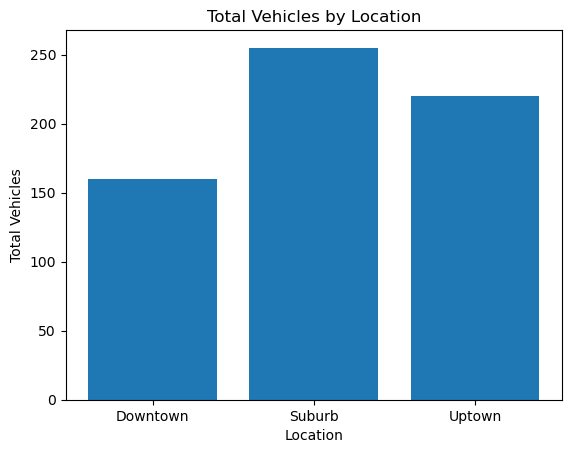


Vehicle Type Distribution:
('Bike', 16.535433070866144)
('Bus', 4.724409448818897)
('Car', 78.74015748031496)


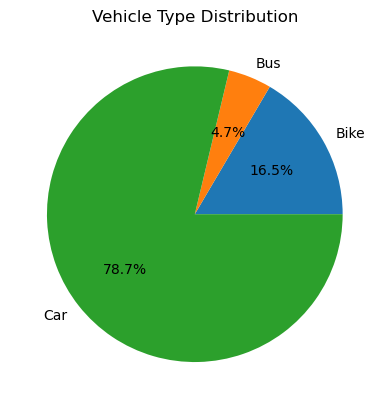

In [3]:
import sqlite3
import matplotlib.pyplot as plt

# 1. 数据库创建与初始化
def create_database():
    conn = sqlite3.connect("traffic_data.db")
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Traffic (
            RecordID INTEGER PRIMARY KEY,
            Location TEXT NOT NULL,
            VehicleType TEXT NOT NULL,
            VehicleCount INTEGER NOT NULL
        )
    ''')
    cursor.executemany('''
        INSERT INTO Traffic (RecordID, Location, VehicleType, VehicleCount)
        VALUES (?, ?, ?, ?)
    ''', [
        (1, 'Downtown', 'Car', 120),
        (2, 'Downtown', 'Bus', 15),
        (3, 'Downtown', 'Bike', 25),
        (4, 'Suburb', 'Car', 200),
        (5, 'Suburb', 'Bus', 5),
        (6, 'Suburb', 'Bike', 50),
        (7, 'Uptown', 'Car', 180),
        (8, 'Uptown', 'Bus', 10),
        (9, 'Uptown', 'Bike', 30)
    ])
    conn.commit()
    conn.close()

# 2. 按区域统计车辆总数
def calculate_total_vehicles():
    conn = sqlite3.connect("traffic_data.db")
    cursor = conn.cursor()
    cursor.execute('''
        SELECT Location, SUM(VehicleCount) AS TotalVehicles
        FROM Traffic
        GROUP BY Location
    ''')
    results = cursor.fetchall()
    conn.close()
    return results

# 3. 按车辆类型统计流量占比
def calculate_vehicle_distribution():
    conn = sqlite3.connect("traffic_data.db")
    cursor = conn.cursor()
    cursor.execute('''
        SELECT VehicleType, SUM(VehicleCount) * 1.0 / 
        (SELECT SUM(VehicleCount) FROM Traffic) * 100 AS Percentage
        FROM Traffic
        GROUP BY VehicleType
    ''')
    results = cursor.fetchall()
    conn.close()
    return results

# 4. 可视化
def plot_totals(totals):
    locations = [row[0] for row in totals]
    vehicle_counts = [row[1] for row in totals]

    plt.bar(locations, vehicle_counts)
    plt.title("Total Vehicles by Location")
    plt.xlabel("Location")
    plt.ylabel("Total Vehicles")
    plt.show()

def plot_distribution(distribution):
    vehicle_types = [row[0] for row in distribution]
    percentages = [row[1] for row in distribution]

    plt.pie(percentages, labels=vehicle_types, autopct='%1.1f%%')
    plt.title("Vehicle Type Distribution")
    plt.show()

# 主程序
create_database()

# 按区域统计车辆总数
totals = calculate_total_vehicles()
print("Total Vehicles by Location:")
for row in totals:
    print(row)
plot_totals(totals)

# 按车辆类型统计流量占比
distribution = calculate_vehicle_distribution()
print("\nVehicle Type Distribution:")
for row in distribution:
    print(row)
plot_distribution(distribution)


题目设计：Python 数据处理与日期和缺失值处理 (40分)
题目背景：
你正在参与一个天气数据分析项目，需要处理包含日期和可能缺失值的天气数据。你的任务是编写一个 Python 程序，完成以下功能。

任务描述：
数据存储与初始化 (5分)
创建一个名为 weather_data.db 的 SQLite 数据库，包含以下表格：

Weather：
RecordID (主键，整数)
Date (字符串，格式为 YYYY-MM-DD)
Temperature (浮点数，表示当天的平均温度，可能为空)
Humidity (整数，表示当天的平均湿度)
插入以下示例数据：
yaml
| RecordID | Date       | Temperature | Humidity |
|----------|------------|-------------|----------|
| 1        | 2024-12-01 | 15.5        | 80       |
| 2        | 2024-12-02 | NULL        | 75       |
| 3        | 2024-12-03 | 10.0        | NULL     |
| 4        | 2024-12-04 | 8.0         | 65       |

处理缺失值 (10分)
编写一个函数 handle_missing_data，完成以下操作：

如果 Temperature 为 NULL，将其填充为最近一次非 NULL 值（向前填充）。
如果 Humidity 为 NULL，将其填充为该列的平均值（忽略 NULL 计算平均值）。
更新填充后的数据至数据库。
按日期范围统计天气数据 (10分)
编写一个函数 get_weather_data(start_date, end_date)，从 Weather 表中检索给定日期范围内的天气数据，返回如下格式：

yaml

| Date       | Temperature | Humidity |
|------------|-------------|----------|
| 2024-12-01 | 15.5        | 80       |
| 2024-12-02 | 15.5        | 75       |
| 2024-12-03 | 10.0        | 73.33    |
| 2024-12-04 | 8.0         | 65       |

数据可视化 (10分)

使用 Matplotlib 绘制折线图，展示日期范围内的温度和湿度变化。
温度和湿度分别使用两条折线，添加图例区分。
异常处理 (5分)

如果输入日期格式错误，捕获异常并提示 "Invalid date format. Use YYYY-MM-DD."
如果查询范围内没有数据，提示 "No data available for the selected range."

Weather Data:
('2024-12-01', 15.5, 80)
('2024-12-02', 15.5, 75)
('2024-12-03', 10.0, 73.33333333333333)
('2024-12-04', 8.0, 65)


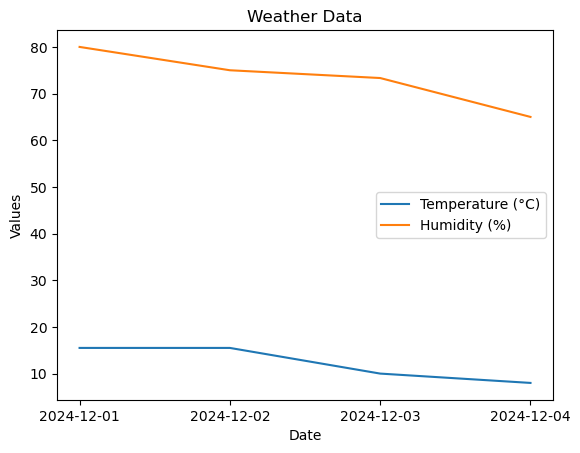

In [4]:
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime

# 1. 数据存储与初始化
def create_database():
    conn = sqlite3.connect("weather_data.db")
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Weather (
            RecordID INTEGER PRIMARY KEY,
            Date TEXT NOT NULL,
            Temperature REAL,
            Humidity INTEGER
        )
    ''')
    cursor.executemany('''
        INSERT INTO Weather (RecordID, Date, Temperature, Humidity)
        VALUES (?, ?, ?, ?)
    ''', [
        (1, '2024-12-01', 15.5, 80),
        (2, '2024-12-02', None, 75),
        (3, '2024-12-03', 10.0, None),
        (4, '2024-12-04', 8.0, 65)
    ])
    conn.commit()
    conn.close()

# 2. 处理缺失值
def handle_missing_data():
    conn = sqlite3.connect("weather_data.db")
    cursor = conn.cursor()
    
    # 填充 Temperature 的缺失值
    cursor.execute('''
        SELECT RecordID, Temperature
        FROM Weather
        ORDER BY RecordID
    ''')
    rows = cursor.fetchall()
    last_temp = None
    for record_id, temp in rows:
        if temp is not None:
            last_temp = temp
        else:
            cursor.execute('UPDATE Weather SET Temperature = ? WHERE RecordID = ?', (last_temp, record_id))
    
    # 填充 Humidity 的缺失值
    cursor.execute('SELECT AVG(Humidity) FROM Weather WHERE Humidity IS NOT NULL')
    avg_humidity = cursor.fetchone()[0]
    cursor.execute('UPDATE Weather SET Humidity = ? WHERE Humidity IS NULL', (avg_humidity,))
    
    conn.commit()
    conn.close()

# 3. 按日期范围统计天气数据
def get_weather_data(start_date, end_date):
    try:
        datetime.strptime(start_date, '%Y-%m-%d')
        datetime.strptime(end_date, '%Y-%m-%d')
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return []
    
    conn = sqlite3.connect("weather_data.db")
    cursor = conn.cursor()
    cursor.execute('''
        SELECT Date, Temperature, Humidity
        FROM Weather
        WHERE Date BETWEEN ? AND ?
    ''', (start_date, end_date))
    results = cursor.fetchall()
    conn.close()
    
    if not results:
        print("No data available for the selected range.")
        return []
    
    return results

# 4. 数据可视化
def plot_weather_data(data):
    dates = [row[0] for row in data]
    temperatures = [row[1] for row in data]
    humidities = [row[2] for row in data]

    plt.plot(dates, temperatures, label='Temperature (°C)')
    plt.plot(dates, humidities, label='Humidity (%)')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title('Weather Data')
    plt.legend()
    plt.show()

# 主程序
create_database()
handle_missing_data()

# 按日期范围获取数据
data = get_weather_data('2024-12-01', '2024-12-04')
if data:
    print("Weather Data:")
    for row in data:
        print(row)
    plot_weather_data(data)


题目设计：Python 数据分析与动态分组 (40分)
题目背景：
你受雇于一家电子商务公司，分析每月的销售数据，并根据销售额动态分组客户（高价值客户、普通客户）。你的任务是编写一个 Python 程序，完成以下功能。

任务描述：
数据存储与初始化 (5分)
创建一个名为 sales_data.db 的 SQLite 数据库，包含以下表格：

Sales：
RecordID (主键，整数)
CustomerName (字符串)
Month (字符串，格式为 YYYY-MM)
Amount (浮点数，表示销售额)
插入以下示例数据：

| RecordID | CustomerName | Month    | Amount |
|----------|--------------|----------|--------|
| 1        | Alice        | 2024-11  | 1200.0 |
| 2        | Bob          | 2024-11  | 800.0  |
| 3        | Alice        | 2024-12  | 950.0  |
| 4        | Bob          | 2024-12  | 400.0  |
| 5        | Charlie      | 2024-12  | 300.0  |

按月份统计总销售额 (10分)
编写一个函数 calculate_monthly_totals，统计每个月的总销售额，返回如下格式：


| Month    | TotalSales |
|----------|------------|
| 2024-11  | 2000.0     |
| 2024-12  | 1650.0     |

动态分组客户 (10分)
编写一个函数 group_customers(threshold)，根据给定的销售额门槛，将客户分为：

高价值客户（销售额 ≥ 门槛）。
普通客户（销售额 < 门槛）。 返回如下格式（以 threshold=1000 为例）：

| Group          | CustomerName | TotalAmount |
|----------------|--------------|-------------|
| High Value     | Alice        | 2150.0      |
| Regular        | Bob          | 1200.0      |
| Regular        | Charlie      | 300.0       |

数据可视化 (10分)

使用 Matplotlib 绘制一个柱状图，显示每个月的总销售额。
绘制饼图，显示高价值客户和普通客户的占比（按总销售额分组）。
异常处理 (5分)

如果输入的月份格式或门槛值无效，提示 "Invalid input format."
如果数据库查询为空，提示 "No data available."


Monthly Totals:
('2024-11', 2000.0)
('2024-12', 1650.0)


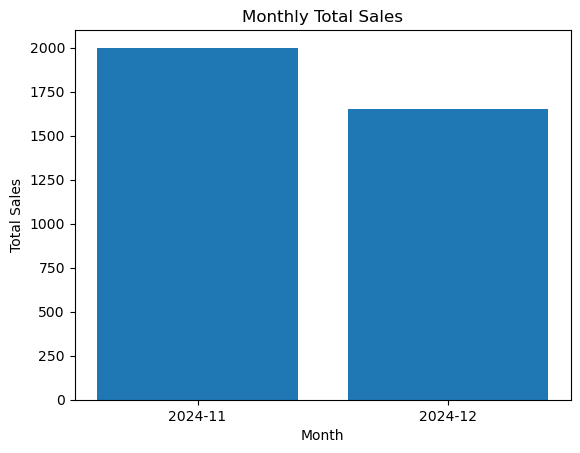


Customer Groups (Threshold: 1000):
('High Value', 'Alice', 2150.0)
('High Value', 'Bob', 1200.0)
('Regular', 'Charlie', 300.0)


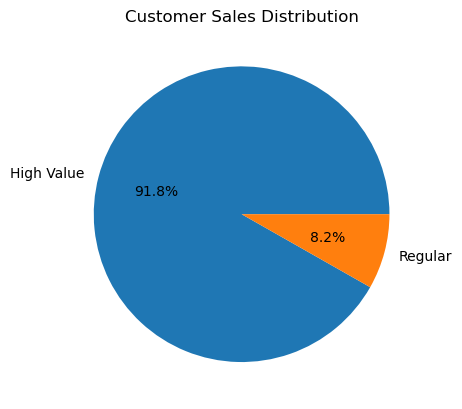

In [5]:
import sqlite3
import matplotlib.pyplot as plt

# 1. 数据存储与初始化
def create_database():
    conn = sqlite3.connect("sales_data.db")
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Sales (
            RecordID INTEGER PRIMARY KEY,
            CustomerName TEXT NOT NULL,
            Month TEXT NOT NULL,
            Amount REAL NOT NULL
        )
    ''')
    cursor.executemany('''
        INSERT INTO Sales (RecordID, CustomerName, Month, Amount)
        VALUES (?, ?, ?, ?)
    ''', [
        (1, 'Alice', '2024-11', 1200.0),
        (2, 'Bob', '2024-11', 800.0),
        (3, 'Alice', '2024-12', 950.0),
        (4, 'Bob', '2024-12', 400.0),
        (5, 'Charlie', '2024-12', 300.0)
    ])
    conn.commit()
    conn.close()

# 2. 按月份统计总销售额
def calculate_monthly_totals():
    conn = sqlite3.connect("sales_data.db")
    cursor = conn.cursor()
    cursor.execute('''
        SELECT Month, SUM(Amount) AS TotalSales
        FROM Sales
        GROUP BY Month
    ''')
    results = cursor.fetchall()
    conn.close()
    return results

# 3. 动态分组客户
def group_customers(threshold):
    if not isinstance(threshold, (int, float)) or threshold <= 0:
        print("Invalid input format.")
        return []
    
    conn = sqlite3.connect("sales_data.db")
    cursor = conn.cursor()
    cursor.execute('''
        SELECT CustomerName, SUM(Amount) AS TotalAmount
        FROM Sales
        GROUP BY CustomerName
    ''')
    results = cursor.fetchall()
    conn.close()
    
    groups = []
    for name, total in results:
        group = "High Value" if total >= threshold else "Regular"
        groups.append((group, name, total))
    
    return groups

# 4. 数据可视化
def plot_sales(data):
    months = [row[0] for row in data]
    totals = [row[1] for row in data]

    plt.bar(months, totals)
    plt.title("Monthly Total Sales")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.show()

def plot_customer_distribution(groups):
    group_totals = {"High Value": 0, "Regular": 0}
    for group, _, total in groups:
        group_totals[group] += total

    labels = group_totals.keys()
    sizes = group_totals.values()

    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title("Customer Sales Distribution")
    plt.show()

# 主程序
create_database()

# 统计总销售额
monthly_totals = calculate_monthly_totals()
print("Monthly Totals:")
for row in monthly_totals:
    print(row)
plot_sales(monthly_totals)

# 动态分组客户
threshold = 1000
groups = group_customers(threshold)
if groups:
    print(f"\nCustomer Groups (Threshold: {threshold}):")
    for row in groups:
        print(row)
    plot_customer_distribution(groups)


任务描述：
文件读取与数据存储 (5分)

创建一个名为 student_scores.csv 的文件，文件内容如下：
javascript
复制代码
StudentID,Name,Subject,Score
101,Alice,Math,85
101,Alice,English,78
102,Bob,Math,92
102,Bob,English,88
103,Charlie,Math,70
103,Charlie,English,65
104,Diana,Math,95
104,Diana,English,90
编写一个函数 read_scores_to_db()，将数据从文件中读取并存储到 SQLite 数据库 students.db 的 Scores 表中：
StudentID (整数)
Name (字符串)
Subject (字符串)
Score (浮点数)
按科目统计平均分 (10分)
编写一个函数 calculate_subject_averages()，从 Scores 表中读取数据，按科目计算平均分，并返回如下格式：

| Subject  | AverageScore |
|----------|--------------|
| Math     | 85.5         |
| English  | 80.25        |

按学生统计总分与排名 (10分)
编写一个函数 rank_students()，计算每个学生的总分并按总分排名，返回如下格式：

| Rank | Name    | TotalScore |
|------|---------|------------|
| 1    | Diana   | 185.0      |
| 2    | Bob     | 180.0      |
| 3    | Alice   | 163.0      |
| 4    | Charlie | 135.0      |

数据可视化 (10分)

使用 Matplotlib 绘制柱状图，显示每个科目的平均分。
绘制折线图，显示学生的总分排名。
异常处理 (5分)

文件不存在时提示 "File not found."
数据库操作失败时捕获异常并提示 "Database error occurred."


Subject Averages:
('English', 80.25)
('Math', 85.5)


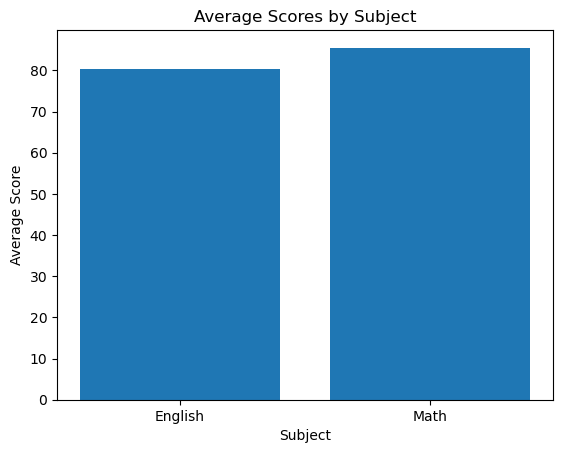


Student Rankings:
(1, 'Diana', 185.0)
(2, 'Bob', 180.0)
(3, 'Alice', 163.0)
(4, 'Charlie', 135.0)


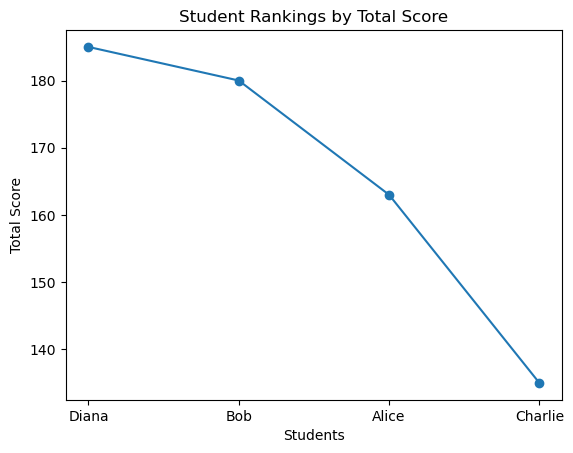

In [7]:
import sqlite3
import csv
import matplotlib.pyplot as plt
import os

# 1. 创建CSV文件
def create_csv_file():
    data = [
        {"StudentID": 101, "Name": "Alice", "Subject": "Math", "Score": 85},
        {"StudentID": 101, "Name": "Alice", "Subject": "English", "Score": 78},
        {"StudentID": 102, "Name": "Bob", "Subject": "Math", "Score": 92},
        {"StudentID": 102, "Name": "Bob", "Subject": "English", "Score": 88},
        {"StudentID": 103, "Name": "Charlie", "Subject": "Math", "Score": 70},
        {"StudentID": 103, "Name": "Charlie", "Subject": "English", "Score": 65},
        {"StudentID": 104, "Name": "Diana", "Subject": "Math", "Score": 95},
        {"StudentID": 104, "Name": "Diana", "Subject": "English", "Score": 90},
    ]
    with open("student_scores.csv", "w", newline="") as file:
        writer = csv.DictWriter(file, fieldnames=["StudentID", "Name", "Subject", "Score"])
        writer.writeheader()
        writer.writerows(data)

# 2. 文件读取与数据存储
def read_scores_to_db():
    if not os.path.exists("student_scores.csv"):
        print("File not found.")
        return
    
    conn = sqlite3.connect("students.db")
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Scores (
            StudentID INTEGER,
            Name TEXT,
            Subject TEXT,
            Score REAL
        )
    ''')
    with open("student_scores.csv", "r") as file:
        reader = csv.DictReader(file)
        data = [(row["StudentID"], row["Name"], row["Subject"], row["Score"]) for row in reader]
    cursor.executemany('''
        INSERT INTO Scores (StudentID, Name, Subject, Score)
        VALUES (?, ?, ?, ?)
    ''', data)
    conn.commit()
    conn.close()

# 3. 按科目统计平均分
def calculate_subject_averages():
    conn = sqlite3.connect("students.db")
    cursor = conn.cursor()
    cursor.execute('''
        SELECT Subject, AVG(Score) AS AverageScore
        FROM Scores
        GROUP BY Subject
    ''')
    results = cursor.fetchall()
    conn.close()
    return results

# 4. 按学生统计总分与排名
def rank_students():
    conn = sqlite3.connect("students.db")
    cursor = conn.cursor()
    cursor.execute('''
        SELECT Name, SUM(Score) AS TotalScore
        FROM Scores
        GROUP BY Name
        ORDER BY TotalScore DESC
    ''')
    results = cursor.fetchall()
    conn.close()
    return [(rank+1, name, total) for rank, (name, total) in enumerate(results)]

# 5. 数据可视化
def plot_subject_averages(averages):
    subjects = [row[0] for row in averages]
    scores = [row[1] for row in averages]

    plt.bar(subjects, scores)
    plt.title("Average Scores by Subject")
    plt.xlabel("Subject")
    plt.ylabel("Average Score")
    plt.show()

def plot_student_ranking(rankings):
    names = [row[1] for row in rankings]
    scores = [row[2] for row in rankings]

    plt.plot(names, scores, marker='o')
    plt.title("Student Rankings by Total Score")
    plt.xlabel("Students")
    plt.ylabel("Total Score")
    plt.show()

# 主程序
create_csv_file()  # 创建CSV文件
read_scores_to_db()  # 将数据存入数据库

# 科目平均分
averages = calculate_subject_averages()
print("Subject Averages:")
for row in averages:
    print(row)
plot_subject_averages(averages)

# 学生成绩排名
rankings = rank_students()
print("\nStudent Rankings:")
for row in rankings:
    print(row)
plot_student_ranking(rankings)


题目设计：Python 数据清洗与多表关联 (40分)
题目背景：
你受雇于一个线上商店，负责清洗用户和订单数据，并对订单记录进行分析。你的任务是编写一个 Python 程序，完成以下功能。

任务描述：
数据存储与初始化 (10分)
创建一个 SQLite 数据库 ecommerce.db，包含以下两张表：

Users 表：
UserID (主键，整数)
Name (字符串)
Email (字符串，可能包含无效的邮箱地址)
Orders 表：
OrderID (主键，整数)
UserID (整数，外键，关联到 Users.UserID)
OrderAmount (浮点数，订单金额，可能为负值)
插入以下数据： Users 表：

| UserID | Name    | Email                  |
|--------|---------|------------------------|
| 1      | Alice   | alice@example.com      |
| 2      | Bob     | bob@example            |
| 3      | Charlie | charlie@example.com    |
| 4      | Diana   |                        |

Orders 表：


| OrderID | UserID | OrderAmount |
|---------|--------|-------------|
| 101     | 1      | 250.0       |
| 102     | 1      | -50.0       |
| 103     | 2      | 100.0       |
| 104     | 3      | 0.0         |
| 105     | 3      | 300.0       |

数据清洗 (10分)
编写一个函数 clean_data()，完成以下任务：

从 Users 表中删除无效的邮箱地址（不包含 "@" 或后缀为空）。
从 Orders 表中删除金额为负的订单记录。
将清洗后的数据存入数据库。
多表关联分析 (10分)
编写一个函数 analyze_orders()，从清洗后的数据中完成以下任务：

按用户统计总订单金额，返回如下格式：

| Name    | TotalAmount |
|---------|-------------|
| Alice   | 250.0       |
| Bob     | 100.0       |
| Charlie | 300.0       |

如果没有订单，用户总金额显示为 0。
数据可视化 (5分)
使用 Matplotlib 绘制饼图，展示每个用户的总订单金额占比。

异常处理 (5分)

数据库操作失败时，捕获异常并打印错误信息。
如果用户没有有效邮箱地址且没有订单记录，则提示 "No valid data available."

Data cleaned successfully.
Order Analysis:
('Alice', 250.0)
('Charlie', 300.0)


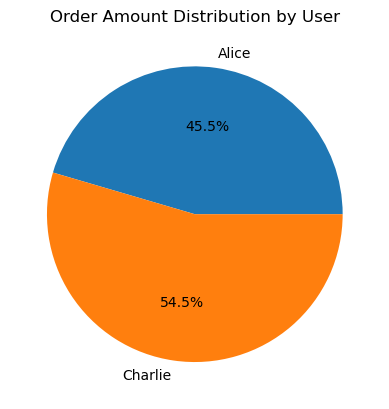

In [1]:
import sqlite3
import matplotlib.pyplot as plt

# 1. 数据存储与初始化
def initialize_database():
    conn = sqlite3.connect("ecommerce.db")
    cursor = conn.cursor()

    # 删除旧表（如果存在），避免表结构冲突
    cursor.execute('DROP TABLE IF EXISTS Users')
    cursor.execute('DROP TABLE IF EXISTS Orders')

    # 创建 Users 表
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Users (
            UserID INTEGER PRIMARY KEY,
            Name TEXT NOT NULL,
            Email TEXT
        )
    ''')

    # 创建 Orders 表
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Orders (
            OrderID INTEGER PRIMARY KEY,
            UserID INTEGER,
            OrderAmount REAL,
            FOREIGN KEY (UserID) REFERENCES Users (UserID)
        )
    ''')

    # 插入 Users 表数据
    cursor.executemany('''
        INSERT INTO Users (UserID, Name, Email)
        VALUES (?, ?, ?)
    ''', [
        (1, 'Alice', 'alice@example.com'),
        (2, 'Bob', 'bob@example'),
        (3, 'Charlie', 'charlie@example.com'),
        (4, 'Diana', '')
    ])

    # 插入 Orders 表数据
    cursor.executemany('''
        INSERT INTO Orders (OrderID, UserID, OrderAmount)
        VALUES (?, ?, ?)
    ''', [
        (101, 1, 250.0),
        (102, 1, -50.0),
        (103, 2, 100.0),
        (104, 3, 0.0),
        (105, 3, 300.0)
    ])

    conn.commit()
    conn.close()

# 2. 数据清洗
def clean_data():
    try:
        conn = sqlite3.connect("ecommerce.db")
        cursor = conn.cursor()

        # 清洗 Users 表：删除无效邮箱
        cursor.execute('''
            DELETE FROM Users
            WHERE Email NOT LIKE '%@%.%'
        ''')

        # 清洗 Orders 表：删除负金额订单
        cursor.execute('''
            DELETE FROM Orders
            WHERE OrderAmount < 0
        ''')

        conn.commit()
        conn.close()
        print("Data cleaned successfully.")
    except sqlite3.Error as e:
        print("Database error occurred:", e)

# 3. 多表关联分析
def analyze_orders():
    try:
        conn = sqlite3.connect("ecommerce.db")
        cursor = conn.cursor()

        # 按用户统计总订单金额
        cursor.execute('''
            SELECT u.Name, IFNULL(SUM(o.OrderAmount), 0) AS TotalAmount
            FROM Users u
            LEFT JOIN Orders o ON u.UserID = o.UserID
            GROUP BY u.UserID
        ''')
        results = cursor.fetchall()
        conn.close()
        return results
    except sqlite3.Error as e:
        print("Database error occurred:", e)
        return []

# 4. 数据可视化
def plot_order_distribution(data):
    names = [row[0] for row in data]
    amounts = [row[1] for row in data]

    plt.pie(amounts, labels=names, autopct='%1.1f%%')
    plt.title("Order Amount Distribution by User")
    plt.show()

# 主程序
initialize_database()
clean_data()

# 多表关联分析
data = analyze_orders()
if data:
    print("Order Analysis:")
    for row in data:
        print(row)
    plot_order_distribution(data)
else:
    print("No valid data available.")
